# >>Recurring tickets by Prioritywise and Valuewise

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel('C:\\Users\\MaheshAlleswaram\\Desktop\\ticket.xlsx')
df.head()

,TICKETID,OPEN,ASSIGNDATE,RESOLVE,CLOSE,RESOLVERGROUP,RESOLVER,DESCRIPTION,INTERNALPRIORITY,STATUS,...,ASSETNUM,CINUM,CLASS,DURATION,NORMALIZED_SLA_TIME,SLA,NUMBER_HOPS,INVOLVED_GROUPS,groups,repeat hops
0,SR61876354,2019-05-01 00:10:57,2019-05-01 00:12:29,2019-05-01 04:33:09,2019-05-06 13:13:29,I-EUS-DE-CSC-SDK-HLCFRONTDESK3,T_EBOND@HLAG.COM,VOIP - chrismi - Change User,3,CLOSED,...,NaN,PBUE2548,SR,15731.0,469.0,IN,1,I-EUS-DE-CSC-SDK-HLCFRONTDESK3,1,0
1,IN62701632,2019-05-01 00:13:47,2019-05-01 00:14:00,2019-05-01 04:33:09,2019-05-06 13:13:29,I-EUS-DE-CSC-SDK-HLCFRONTDESK,T_EBOND@HLAG.COM,VOIP - chrismi - Change User,2,CLOSED,...,NaN,PBUE2548,INCIDENT,15562.0,300.0,IN,2,"C-HLC-WW-X-SITA-CHANGE, I-EUS-DE-CSC-SDK-HLCFR...",2,0
2,SR61876355,2019-05-01 00:15:57,2019-05-01 00:16:53,2019-05-01 04:52:28,2019-05-06 13:09:41,I-EUS-DE-CSC-SDK-HLCFRONTDESK3,T_EBOND@HLAG.COM,VOIP - yangkh - Change User,3,CLOSED,...,NaN,PSEL1624,SR,16590.0,967.0,IN,1,I-EUS-DE-CSC-SDK-HLCFRONTDESK3,1,0
3,IN62701633,2019-05-01 00:16:36,2019-05-01 00:16:36,2019-05-01 06:36:33,2019-05-02 11:03:21,I-SSO-US-SMD-INT-WINTEL-HLU,GSMAE6XA@DE.IBM.COM,hlc#khlubu01#An entry in EventLog occured: The...,2,CLOSED,...,NaN,NaN,INCIDENT,22797.0,22797.0,IN,1,I-SSO-US-SMD-INT-WINTEL-HLU,1,0
4,IN62701634,2019-05-01 00:17:45,2019-05-01 00:17:58,2019-05-01 04:52:28,2019-05-06 13:09:41,I-EUS-DE-CSC-SDK-HLCFRONTDESK,T_EBOND@HLAG.COM,VOIP - yangkh - Change User,2,CLOSED,...,NaN,PSEL1624,INCIDENT,16482.0,859.0,IN,2,"C-HLC-WW-X-SITA-CHANGE, I-EUS-DE-CSC-SDK-HLCFR...",2,0


In [4]:
df.columns

Index(['TICKETID', 'OPEN', 'ASSIGNDATE', 'RESOLVE', 'CLOSE', 'RESOLVERGROUP',
       'RESOLVER', 'DESCRIPTION', 'INTERNALPRIORITY', 'STATUS', 'SOLUTION',
       'SERVICES', 'SERVICEGROUP', 'ASSETNUM', 'CINUM', 'CLASS', 'DURATION',
       'NORMALIZED_SLA_TIME', 'SLA', 'NUMBER_HOPS', 'INVOLVED_GROUPS',
       'groups', 'repeat hops'],
      dtype='object')

In [5]:
df.describe()

,INTERNALPRIORITY,ASSETNUM,DURATION,NORMALIZED_SLA_TIME,NUMBER_HOPS,groups,repeat hops
count,68177.000000,1.180000e+03,4.422500e+04,4.963200e+04,68177.000000,68177.000000,68177.000000
mean,2.613638,1.201269e+06,1.523030e+05,1.215728e+05,1.822271,1.562946,0.259325
std,0.568911,6.701190e+04,5.197066e+05,4.471632e+05,1.483686,0.739077,1.136828
min,1.000000,1.099026e+06,4.000000e+00,0.000000e+00,1.000000,1.000000,0.000000
25%,2.000000,1.111091e+06,2.170000e+02,2.180000e+02,1.000000,1.000000,0.000000
50%,3.000000,1.228657e+06,1.535000e+03,1.320000e+03,2.000000,1.000000,0.000000
75%,3.000000,1.264702e+06,6.366700e+04,4.571250e+04,2.000000,2.000000,0.000000
max,4.000000,1.277068e+06,9.724752e+06,9.666271e+06,46.000000,9.000000,41.000000


In [6]:
pd.value_counts(df['SLA'])

IN     45934
OUT     3698
Name: SLA, dtype: int64

In [7]:
df.shape

(68177, 23)

In [8]:
df.isnull().sum()

TICKETID                   0
OPEN                       0
ASSIGNDATE                 0
RESOLVE                17643
CLOSE                  18545
RESOLVERGROUP          17721
RESOLVER               23952
DESCRIPTION                0
INTERNALPRIORITY           0
STATUS                     0
SOLUTION               39819
SERVICES               42115
SERVICEGROUP           42032
ASSETNUM               66997
CINUM                  62606
CLASS                      0
DURATION               23952
NORMALIZED_SLA_TIME    18545
SLA                    18545
NUMBER_HOPS                0
INVOLVED_GROUPS         3346
groups                     0
repeat hops                0
dtype: int64

In [9]:
pd.value_counts(df['CLASS'])

INCIDENT    46541
SR          21588
PROBLEM        48
Name: CLASS, dtype: int64

In [10]:
data=df[['CLASS','OPEN','DESCRIPTION','INTERNALPRIORITY']]

In [11]:
data.head()

,CLASS,OPEN,DESCRIPTION,INTERNALPRIORITY
0,SR,2019-05-01 00:10:57,VOIP - chrismi - Change User,3
1,INCIDENT,2019-05-01 00:13:47,VOIP - chrismi - Change User,2
2,SR,2019-05-01 00:15:57,VOIP - yangkh - Change User,3
3,INCIDENT,2019-05-01 00:16:36,hlc#khlubu01#An entry in EventLog occured: The...,2
4,INCIDENT,2019-05-01 00:17:45,VOIP - yangkh - Change User,2


In [12]:
data.isnull().sum()

CLASS               0
OPEN                0
DESCRIPTION         0
INTERNALPRIORITY    0
dtype: int64

In [13]:
df_IN=data[data['CLASS']=='INCIDENT']

In [14]:
df_IN.shape

(46541, 4)

In [15]:
df_SR=data[data['CLASS']=='SR']

In [16]:
df_SR.shape

(21588, 4)

In [17]:
df_PR=data[data['CLASS']=='PROBLEM']

In [18]:
df_PR.shape

(48, 4)

In [19]:
df_IN.head()

,CLASS,OPEN,DESCRIPTION,INTERNALPRIORITY
1,INCIDENT,2019-05-01 00:13:47,VOIP - chrismi - Change User,2
3,INCIDENT,2019-05-01 00:16:36,hlc#khlubu01#An entry in EventLog occured: The...,2
4,INCIDENT,2019-05-01 00:17:45,VOIP - yangkh - Change User,2
5,INCIDENT,2019-05-01 00:18:37,hlc#kfdcrd33#Cleared and Re-fired: The service...,2
7,INCIDENT,2019-05-01 00:22:22,hlc#hlcptsmfra021s2#hll102b Backup 2300_001D_A...,2


## Prioritywise finding top recurring incidents 

In [20]:
X=df_IN['INTERNALPRIORITY'].value_counts()

In [63]:
df_IN['INTERNALPRIORITY'].value_counts()

3    22949
2    21336
1     1927
4      329
Name: INTERNALPRIORITY, dtype: int64

Text(0, 0.5, 'No. Of incidents')

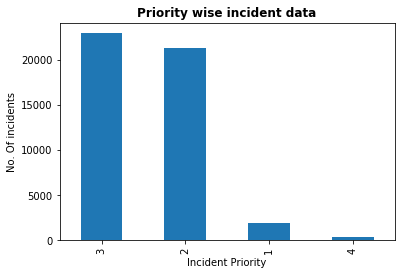

In [60]:
df_IN['INTERNALPRIORITY'].value_counts().plot(kind='bar')
plt.title('Priority wise incident data',fontweight='bold')
plt.xlabel('Incident Priority')
plt.ylabel('No. Of incidents')

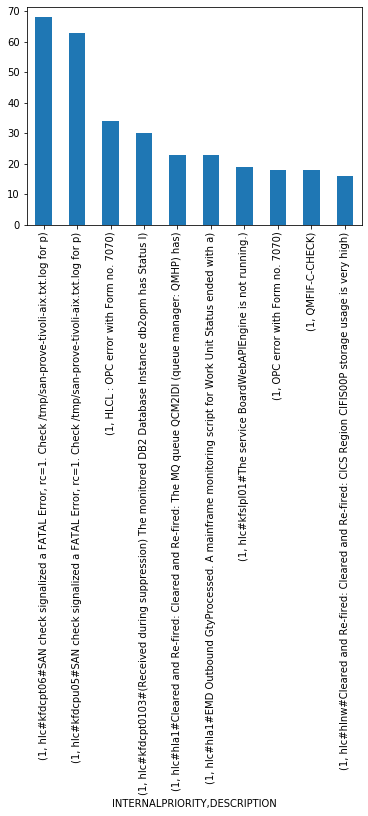

In [22]:
pr1=df_IN[df_IN['INTERNALPRIORITY']==1].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts()
df_IN[df_IN['INTERNALPRIORITY']==1].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts().head(10).plot(kind='bar')

In [23]:
pr1.head(10)

INTERNALPRIORITY  DESCRIPTION                                                                                         
1                 hlc#kfdcpt06#SAN check signalized a FATAL Error, rc=1. Check /tmp/san-prove-tivoli-aix.txt.log for p    68
                  hlc#kfdcpu05#SAN check signalized a FATAL Error, rc=1. Check /tmp/san-prove-tivoli-aix.txt.log for p    63
                  HLCL : OPC error with Form no. 7070                                                                     34
                  hlc#kfdcpt0103#(Received during suppression) The monitored DB2 Database Instance db2opm has Status I    30
                  hlc#hla1#Cleared and Re-fired: Cleared and Re-fired: The MQ queue QCM2IDI (queue manager: QMHP) has     23
                  hlc#hla1#EMD Outbound GtyProcessed. A mainframe monitoring script for Work Unit Status ended with a     23
                  hlc#kfslpl01#The service BoardWebAPIEngine is not running.                                              19
      

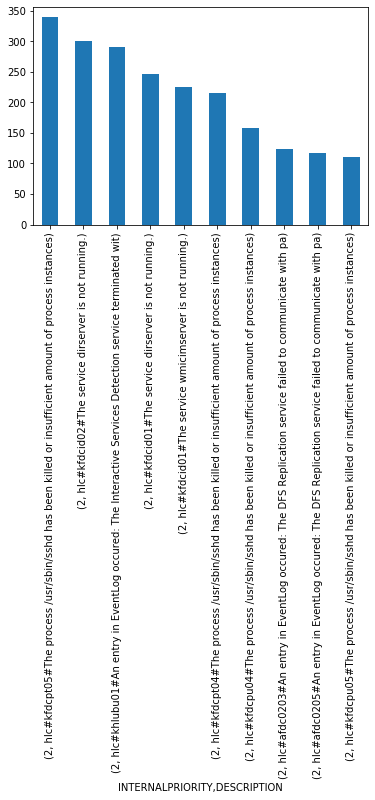

In [24]:
pr2=df_IN[df_IN['INTERNALPRIORITY']==2].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts()
df_IN[df_IN['INTERNALPRIORITY']==2].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts().head(10).plot(kind='bar')

In [25]:
pr2.head(10)

INTERNALPRIORITY  DESCRIPTION                                                                                         
2                 hlc#kfdcpt05#The process /usr/sbin/sshd has been killed or insufficient amount of process instances     339
                  hlc#kfdcid02#The service dirserver is not running.                                                      300
                  hlc#khlubu01#An entry in EventLog occured: The Interactive Services Detection service terminated wit    290
                  hlc#kfdcid01#The service dirserver is not running.                                                      247
                  hlc#kfdcid01#The service wmicimserver is not running.                                                   225
                  hlc#kfdcpt04#The process /usr/sbin/sshd has been killed or insufficient amount of process instances     215
                  hlc#kfdcpu04#The process /usr/sbin/sshd has been killed or insufficient amount of process instances     158

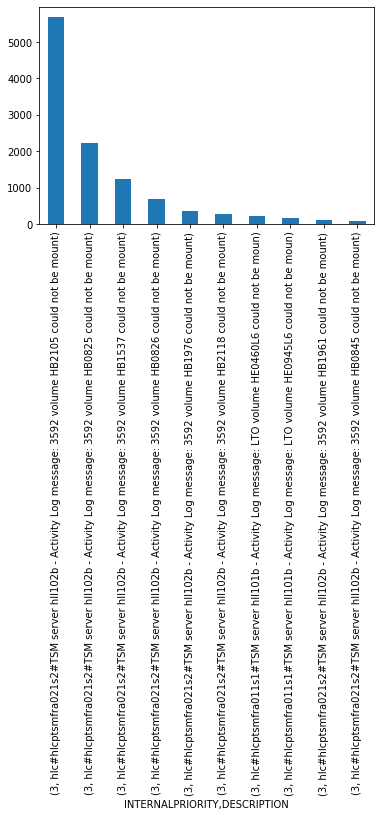

In [26]:
pr3=df_IN[df_IN['INTERNALPRIORITY']==3].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts()
df_IN[df_IN['INTERNALPRIORITY']==3].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts().head(10).plot(kind='bar')

In [27]:
pr3.head(10)

INTERNALPRIORITY  DESCRIPTION                                                                                         
3                 hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB2105 could not be mount    5691
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB0825 could not be mount    2215
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB1537 could not be mount    1234
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB0826 could not be mount     697
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB1976 could not be mount     348
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB2118 could not be mount     263
                  hlc#hlcptsmfra011s1#TSM server hll101b - Activity Log message: LTO volume HE0460L6 could not be moun 

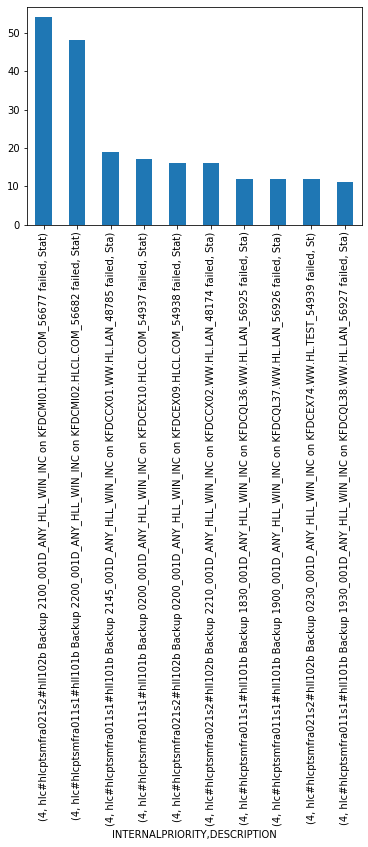

In [28]:
pr4=df_IN[df_IN['INTERNALPRIORITY']==4].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts()
df_IN[df_IN['INTERNALPRIORITY']==4].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts().head(10).plot(kind='bar')

In [29]:
pr4.head(10)

INTERNALPRIORITY  DESCRIPTION                                                                                         
4                 hlc#hlcptsmfra021s2#hll102b Backup 2100_001D_ANY_HLL_WIN_INC on KFDCMI01.HLCL.COM_56677 failed, Stat    54
                  hlc#hlcptsmfra011s1#hll101b Backup 2200_001D_ANY_HLL_WIN_INC on KFDCMI02.HLCL.COM_56682 failed, Stat    48
                  hlc#hlcptsmfra011s1#hll101b Backup 2145_001D_ANY_HLL_WIN_INC on KFDCCX01.WW.HL.LAN_48785 failed, Sta    19
                  hlc#hlcptsmfra011s1#hll101b Backup 0200_001D_ANY_HLL_WIN_INC on KFDCEX10.HLCL.COM_54937 failed, Stat    17
                  hlc#hlcptsmfra021s2#hll102b Backup 0200_001D_ANY_HLL_WIN_INC on KFDCEX09.HLCL.COM_54938 failed, Stat    16
                  hlc#hlcptsmfra021s2#hll102b Backup 2210_001D_ANY_HLL_WIN_INC on KFDCCX02.WW.HL.LAN_48174 failed, Sta    16
                  hlc#hlcptsmfra011s1#hll101b Backup 1830_001D_ANY_HLL_WIN_INC on KFDCQL36.WW.HL.LAN_56925 failed, Sta    12
      

## High Recurring Incidents 

In [30]:
X=pd.value_counts(df_IN['DESCRIPTION'])

In [31]:
X.head(10)

hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB2105 could not be mount    5691
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB0825 could not be mount    2215
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB1537 could not be mount    1234
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB0826 could not be mount     697
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB1976 could not be mount     348
hlc#kfdcpt05#The process /usr/sbin/sshd has been killed or insufficient amount of process instances      339
hlc#kfdcid02#The service dirserver is not running.                                                       300
hlc#khlubu01#An entry in EventLog occured: The Interactive Services Detection service terminated wit     290
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB2118 could not be mount     263
hlc#kfdcid01#The se

In [32]:
X.shape

(17063,)

## Prioritywise finding top recurring Service Requests

In [33]:
df_SR['INTERNALPRIORITY'].value_counts()

3    20227
2      695
1      466
4      200
Name: INTERNALPRIORITY, dtype: int64

Text(0, 0.5, 'No. Of SRs')

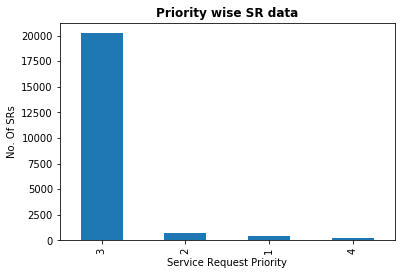

In [64]:
df_SR['INTERNALPRIORITY'].value_counts().plot(kind='bar')
plt.title('Priority wise SR data',fontweight='bold')
plt.xlabel('Service Request Priority')
plt.ylabel('No. Of SRs')

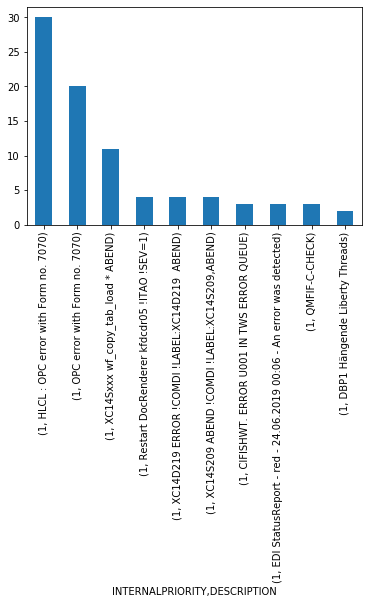

In [35]:
sr1=df_SR[df_SR['INTERNALPRIORITY']==1].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts()
df_SR[df_SR['INTERNALPRIORITY']==1].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts().head(10).plot(kind='bar')

In [36]:
sr1.head(10)

INTERNALPRIORITY  DESCRIPTION                                                      
1                 HLCL : OPC error with Form no. 7070                                  30
                  OPC error with Form no. 7070                                         20
                  XC14Sxxx wf_copy_tab_load * ABEND                                    11
                  Restart DocRenderer kfdcdr05 !ITAO !SEV=1                             4
                  XC14D219 ERROR !COMDI !LABEL:XC14D219  ABEND                          4
                  XC14S209 ABEND !COMDI !LABEL:XC14S209,ABEND                           4
                  CIFISHWT. ERROR U001 IN TWS ERROR QUEUE                               3
                  EDI StatusReport - red - 24.06.2019 00:06 - An error was detected     3
                  QMFIF-C-CHECK                                                         3
                  DBP1 Hängende Liberty Threads                                         2
Name: DESCRIPTIO

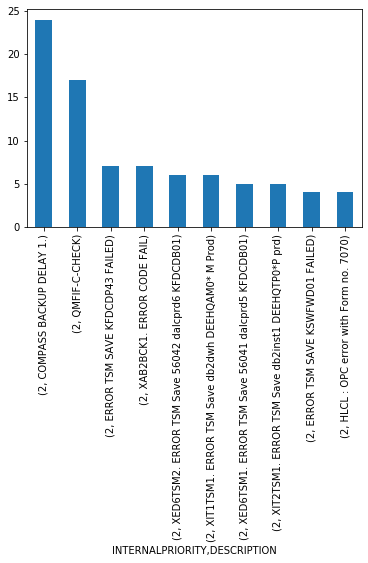

In [37]:
sr2=df_SR[df_SR['INTERNALPRIORITY']==2].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts()
df_SR[df_SR['INTERNALPRIORITY']==2].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts().head(10).plot(kind='bar')

In [38]:
sr2.head(10)

INTERNALPRIORITY  DESCRIPTION                                     
2                 COMPASS BACKUP DELAY 1.                             24
                  QMFIF-C-CHECK                                       17
                  ERROR TSM SAVE KFDCDP43 FAILED                       7
                  XAB2BCK1. ERROR CODE FAIL                            7
                  XED6TSM2. ERROR TSM Save 56042 dalcprd6 KFDCDB01     6
                  XIT1TSM1. ERROR TSM Save db2dwh DEEHQAM0* M Prod     6
                  XED6TSM1. ERROR TSM Save 56041 dalcprd5 KFDCDB01     5
                  XIT2TSM1. ERROR TSM Save db2inst1 DEEHQTP0*P prd     5
                  ERROR TSM SAVE KSWFWD01 FAILED                       4
                  HLCL : OPC error with Form no. 7070                  4
Name: DESCRIPTION, dtype: int64

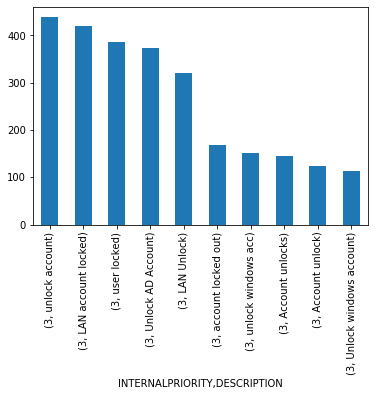

In [39]:
sr3=df_SR[df_SR['INTERNALPRIORITY']==3].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts()
df_SR[df_SR['INTERNALPRIORITY']==3].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts().head(10).plot(kind='bar')

In [40]:
sr3.head(10)

INTERNALPRIORITY  DESCRIPTION           
3                 unlock account            438
                  LAN account locked        421
                  user locked               387
                  Unlock AD Account         373
                  LAN Unlock                321
                  account locked out        169
                  unlock windows acc        152
                  Account unlocks           146
                  Account unlock            123
                  Unlock windows account    113
Name: DESCRIPTION, dtype: int64

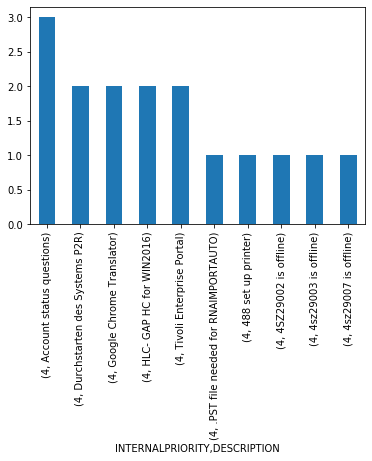

In [41]:
sr4=df_SR[df_SR['INTERNALPRIORITY']==4].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts()
df_SR[df_SR['INTERNALPRIORITY']==4].groupby('INTERNALPRIORITY')['DESCRIPTION'].value_counts().head(10).plot(kind='bar')

In [42]:
sr4.head(10)

INTERNALPRIORITY  DESCRIPTION                       
4                 Account status questions              3
                  Durchstarten des Systems P2R          2
                  Google Chrome Translator              2
                  HLC- GAP HC for WIN2016               2
                  Tivoli Enterprise Portal              2
                  .PST file needed for RNAIMPORTAUTO    1
                  488 set up printer                    1
                  4SZ29002 is offline                   1
                  4sz29003 is offline                   1
                  4sz29007 is offline                   1
Name: DESCRIPTION, dtype: int64

## High Recurring Service Requests

In [43]:
SR=pd.value_counts(df_SR['DESCRIPTION'])

In [44]:
SR.head(10)

unlock account            438
LAN account locked        421
user locked               387
Unlock AD Account         373
LAN Unlock                321
account locked out        169
unlock windows acc        152
Account unlocks           147
Account unlock            123
Unlock windows account    113
Name: DESCRIPTION, dtype: int64

## Top 20 Results of Recurring Incidents 

In [55]:
X.head(20)

hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB2105 could not be mount    5691
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB0825 could not be mount    2215
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB1537 could not be mount    1234
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB0826 could not be mount     697
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB1976 could not be mount     348
hlc#kfdcpt05#The process /usr/sbin/sshd has been killed or insufficient amount of process instances      339
hlc#kfdcid02#The service dirserver is not running.                                                       300
hlc#khlubu01#An entry in EventLog occured: The Interactive Services Detection service terminated wit     290
hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB2118 could not be mount     263
hlc#kfdcid01#The se

## Priortywise value count of the incidents

In [46]:
pr1.head(20)

INTERNALPRIORITY  DESCRIPTION                                                                                         
1                 hlc#kfdcpt06#SAN check signalized a FATAL Error, rc=1. Check /tmp/san-prove-tivoli-aix.txt.log for p    68
                  hlc#kfdcpu05#SAN check signalized a FATAL Error, rc=1. Check /tmp/san-prove-tivoli-aix.txt.log for p    63
                  HLCL : OPC error with Form no. 7070                                                                     34
                  hlc#kfdcpt0103#(Received during suppression) The monitored DB2 Database Instance db2opm has Status I    30
                  hlc#hla1#Cleared and Re-fired: Cleared and Re-fired: The MQ queue QCM2IDI (queue manager: QMHP) has     23
                  hlc#hla1#EMD Outbound GtyProcessed. A mainframe monitoring script for Work Unit Status ended with a     23
                  hlc#kfslpl01#The service BoardWebAPIEngine is not running.                                              19
      

In [47]:
pr2.head(20)

INTERNALPRIORITY  DESCRIPTION                                                                                         
2                 hlc#kfdcpt05#The process /usr/sbin/sshd has been killed or insufficient amount of process instances     339
                  hlc#kfdcid02#The service dirserver is not running.                                                      300
                  hlc#khlubu01#An entry in EventLog occured: The Interactive Services Detection service terminated wit    290
                  hlc#kfdcid01#The service dirserver is not running.                                                      247
                  hlc#kfdcid01#The service wmicimserver is not running.                                                   225
                  hlc#kfdcpt04#The process /usr/sbin/sshd has been killed or insufficient amount of process instances     215
                  hlc#kfdcpu04#The process /usr/sbin/sshd has been killed or insufficient amount of process instances     158

In [48]:
pr3.head(20)

INTERNALPRIORITY  DESCRIPTION                                                                                         
3                 hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB2105 could not be mount    5691
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB0825 could not be mount    2215
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB1537 could not be mount    1234
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB0826 could not be mount     697
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB1976 could not be mount     348
                  hlc#hlcptsmfra021s2#TSM server hll102b - Activity Log message: 3592 volume HB2118 could not be mount     263
                  hlc#hlcptsmfra011s1#TSM server hll101b - Activity Log message: LTO volume HE0460L6 could not be moun 

In [49]:
pr4.head(20)

INTERNALPRIORITY  DESCRIPTION                                                                                          
4                 hlc#hlcptsmfra021s2#hll102b Backup 2100_001D_ANY_HLL_WIN_INC on KFDCMI01.HLCL.COM_56677 failed, Stat     54
                  hlc#hlcptsmfra011s1#hll101b Backup 2200_001D_ANY_HLL_WIN_INC on KFDCMI02.HLCL.COM_56682 failed, Stat     48
                  hlc#hlcptsmfra011s1#hll101b Backup 2145_001D_ANY_HLL_WIN_INC on KFDCCX01.WW.HL.LAN_48785 failed, Sta     19
                  hlc#hlcptsmfra011s1#hll101b Backup 0200_001D_ANY_HLL_WIN_INC on KFDCEX10.HLCL.COM_54937 failed, Stat     17
                  hlc#hlcptsmfra021s2#hll102b Backup 0200_001D_ANY_HLL_WIN_INC on KFDCEX09.HLCL.COM_54938 failed, Stat     16
                  hlc#hlcptsmfra021s2#hll102b Backup 2210_001D_ANY_HLL_WIN_INC on KFDCCX02.WW.HL.LAN_48174 failed, Sta     16
                  hlc#hlcptsmfra011s1#hll101b Backup 1830_001D_ANY_HLL_WIN_INC on KFDCQL36.WW.HL.LAN_56925 failed, Sta     1

## Top 20 Results of Recurring Service Requests

In [50]:
SR.head(20)

unlock account               438
LAN account locked           421
user locked                  387
Unlock AD Account            373
LAN Unlock                   321
account locked out           169
unlock windows acc           152
Account unlocks              147
Account unlock               123
Unlock windows account       113
AD unlock                    100
unlock ad pw                  89
NVAS PW RESET                 84
Win AD account unlocked       64
resume host ID                57
LAN unlock                    53
reset Windows password        46
Mailbox capacity increase     45
Unlock FIS Account            41
Password resets               37
Name: DESCRIPTION, dtype: int64

## Prioritywise Value count of the Service Requests

In [51]:
sr1.head(20)

INTERNALPRIORITY  DESCRIPTION                                                      
1                 HLCL : OPC error with Form no. 7070                                  30
                  OPC error with Form no. 7070                                         20
                  XC14Sxxx wf_copy_tab_load * ABEND                                    11
                  Restart DocRenderer kfdcdr05 !ITAO !SEV=1                             4
                  XC14D219 ERROR !COMDI !LABEL:XC14D219  ABEND                          4
                  XC14S209 ABEND !COMDI !LABEL:XC14S209,ABEND                           4
                  CIFISHWT. ERROR U001 IN TWS ERROR QUEUE                               3
                  EDI StatusReport - red - 24.06.2019 00:06 - An error was detected     3
                  QMFIF-C-CHECK                                                         3
                  DBP1 Hängende Liberty Threads                                         2
                

In [52]:
sr2.head(20)

INTERNALPRIORITY  DESCRIPTION                                                    
2                 COMPASS BACKUP DELAY 1.                                            24
                  QMFIF-C-CHECK                                                      17
                  ERROR TSM SAVE KFDCDP43 FAILED                                      7
                  XAB2BCK1. ERROR CODE FAIL                                           7
                  XED6TSM2. ERROR TSM Save 56042 dalcprd6 KFDCDB01                    6
                  XIT1TSM1. ERROR TSM Save db2dwh DEEHQAM0* M Prod                    6
                  XED6TSM1. ERROR TSM Save 56041 dalcprd5 KFDCDB01                    5
                  XIT2TSM1. ERROR TSM Save db2inst1 DEEHQTP0*P prd                    5
                  ERROR TSM SAVE KSWFWD01 FAILED                                      4
                  HLCL : OPC error with Form no. 7070                                 4
                  QMF Check - Job clas

In [53]:
sr3.head(20)

INTERNALPRIORITY  DESCRIPTION              
3                 unlock account               438
                  LAN account locked           421
                  user locked                  387
                  Unlock AD Account            373
                  LAN Unlock                   321
                  account locked out           169
                  unlock windows acc           152
                  Account unlocks              146
                  Account unlock               123
                  Unlock windows account       113
                  AD unlock                    100
                  unlock ad pw                  89
                  NVAS PW RESET                 83
                  Win AD account unlocked       64
                  resume host ID                57
                  LAN unlock                    53
                  reset Windows password        46
                  Mailbox capacity increase     45
                  Unlock FIS Account  

In [54]:
sr4.head(20)

INTERNALPRIORITY  DESCRIPTION                                
4                 Account status questions                       3
                  Durchstarten des Systems P2R                   2
                  Google Chrome Translator                       2
                  HLC- GAP HC for WIN2016                        2
                  Tivoli Enterprise Portal                       2
                  .PST file needed for RNAIMPORTAUTO             1
                  488 set up printer                             1
                  4SZ29002 is offline                            1
                  4sz29003 is offline                            1
                  4sz29007 is offline                            1
                  4sz29008 is offline                            1
                  84942026 change room to 4.22                   1
                  @@14x24" Monitore//354400                      1
                  @@Condeco Add-In is missing                    1


## >>> Thank You...